<a href="https://colab.research.google.com/github/ziying-Han/10811221/blob/master/Copy_of_schedule_%E7%88%AC%E8%9F%B2_2330.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install mpl_finance

[*********************100%***********************]  1 of 1 downloaded


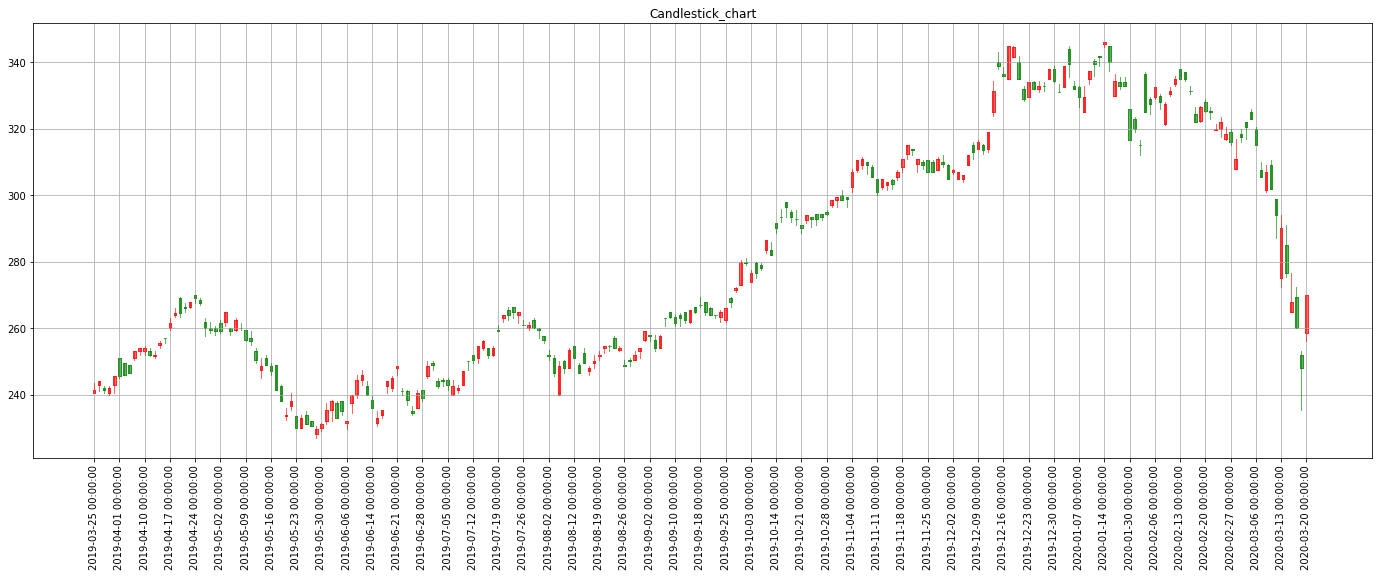

In [5]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data
import fix_yahoo_finance as yf # yahoo專用的拿來拉股票資訊
import datetime
import matplotlib.pyplot as plt # 繪圖專用
import mpl_finance as mpf # 專門用來畫蠟燭圖的

userstock='2330'
start = datetime.datetime.now() - datetime.timedelta(days=365) #先設定要爬的時間
end = datetime.date.today()

# 與yahoo請求
pd.core.common.is_list_like = pd.api.types.is_list_like
yf.pdr_override()

# 取得股票資料
stock = data.get_data_yahoo(userstock+'.TW', start, end)

# 股票K線圖
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(stock.index), 5))
ax.set_xticklabels(stock.index[::5])
plt.xticks(fontsize=10,rotation=90)
mpf.candlestick2_ochl(ax, stock['Open'], stock['Close'], stock['High'], stock['Low'],
                     width=0.5, colorup='r', colordown='green',
                     alpha=0.6)
plt.title("Candlestick_chart") # 標題設定
plt.grid()
plt.savefig('Candlestick_chart.png') #存檔

In [13]:
import requests, os
 
"""
發送 Line Notify 訊息
"""
def lineNotify(token, msg, picURI):
    url = "https://notify-api.line.me/api/notify"
    headers = {
        "Authorization": "Bearer " + token
    }
   
    payload = {'message': msg}
    files = {'imageFile': open(picURI, 'rb')}
    r = requests.post(url, headers = headers, params = payload, files = files)
    return r.status_code
 
 
#token = os.environ["LINE_TEST_TOKEN"]
token="EfSutilufzvqde958hPwJ1m0dy3l0l5NpwpwDxKbaFG"
msg = "Hello Python"
picURI = "下載.png"
 
 
lineNotify(token, msg, picURI)


200